In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df[housing.target_names[0]]=housing.target

In [14]:
X=df.drop(columns='MedHouseVal')
q1=X.quantile(0.25)
q2=X.quantile(0.5)
q3=X.quantile(0.75)
me=X.mean()
m=X.min()
M=X.max()
Ma=np.max(np.abs(X))

In [15]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


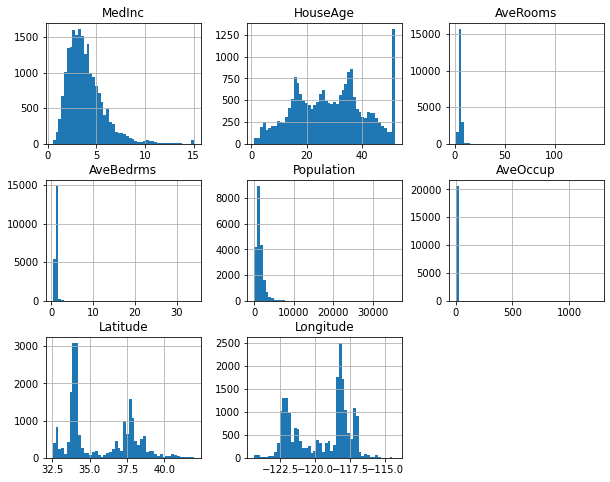

In [16]:
H=X.hist(bins=50,figsize=(10,8))

# Escalamiento por cuantiles (o robusto)
$$
Y=\frac{X-Q_2}{Q_3-Q_1},
$$
donde $Q_1$, $Q_2$ y $Q_3$ son los cuartiles uno, dos y tres, respectivamente (de modo que $Q_2$ es la mediana).

In [17]:
Yr1=(X-q2)/(q3-q1)
Yr1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,1.540799e-01,-0.018974,0.124015,0.512533,0.276628,0.296227,0.362926,-0.284882
std,8.715378e-01,0.662398,1.535166,5.071439,1.207316,12.182767,0.565067,0.528636
min,-1.392252e+00,-1.473684,-2.719533,-7.656179,-1.239872,-2.493559,-0.455026,-1.546174
25%,-4.456270e-01,-0.578947,-0.489191,-0.456959,-0.404051,-0.455561,-0.087302,-0.873351
50%,1.018608e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.543730e-01,0.421053,0.510809,0.543041,0.595949,0.544439,0.912698,0.126649
max,5.259674e+00,1.210526,84.806698,353.332681,36.797441,1455.116059,2.034392,1.102902


In [18]:
Yr1.quantile(0.75)-Yr1.quantile(0.25)

MedInc        1.0
HouseAge      1.0
AveRooms      1.0
AveBedrms     1.0
Population    1.0
AveOccup      1.0
Latitude      1.0
Longitude     1.0
dtype: float64

In [19]:
# Otra forma de hacerlo
from sklearn.preprocessing import RobustScaler

In [20]:
esc=RobustScaler()
Yr2=esc.fit_transform(X)
q1,q2,q3=np.quantile(Yr2,[0.25,0.5,0.75],axis=0)
q2

array([1.01860794e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [21]:
q3-q1

array([1., 1., 1., 1., 1., 1., 1., 1.])

# Normalización basada en la media
$$
Y=\frac{X-\bar{x}}{\max(X)-\min(X)},
$$
donde $\bar{x}$ es la media aritmética del conjunto $X$.

In [22]:
Ym1=(X-me)/(M-m)
Ym1.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-3.298590e-15,-3.571849e-16,7.710607e-17,7.695104e-17,-4.344688e-19,-6.015759e-18,-1.749708e-14,-2.845357e-13
std,1.310204e-01,2.467756e-01,1.753950e-02,1.404874e-02,3.174030e-02,8.358045e-03,2.269875e-01,1.995550e-01
min,-2.324638e-01,-5.419507e-01,-3.248795e-02,-2.262871e-02,-3.986874e-02,-1.913946e-03,-3.285719e-01,-4.761251e-01
25%,-9.015538e-02,-2.086174e-01,-7.005976e-03,-2.685655e-03,-1.789503e-02,-5.157676e-04,-1.808567e-01,-2.221410e-01
50%,-2.316320e-02,7.068893e-03,-1.416892e-03,-1.419802e-03,-7.272534e-03,-2.032280e-04,-1.457876e-01,1.075403e-01
75%,6.017703e-02,1.639316e-01,4.419171e-03,8.451334e-05,8.394945e-03,1.702871e-04,2.208436e-01,1.553490e-01
max,7.675362e-01,4.580493e-01,9.675120e-01,9.773713e-01,9.601313e-01,9.980861e-01,6.714281e-01,5.238749e-01


In [23]:
Ym1.max()-Ym1.min()

MedInc        1.0
HouseAge      1.0
AveRooms      1.0
AveBedrms     1.0
Population    1.0
AveOccup      1.0
Latitude      1.0
Longitude     1.0
dtype: float64

In [24]:
# Clases para la transformación
from sklearn.preprocessing import StandardScaler #, RobustScaler

In [27]:
ss=StandardScaler(with_mean=True,with_std=False) # Unicamente desplazamos
rs=RobustScaler(with_centering=False,with_scaling=True,quantile_range=(0,100)) # Unicamente escalamos usando un rango entre 0 y 100

ss.fit(X)
rs.fit(X)
# Primero hacemos el desplazamiento
Xd=ss.transform(X) # Regresa un arreglo de numpy
# Despues hacemos el escalamiento
Ym2=rs.transform(pd.DataFrame(Xd,columns=X.columns))
Ym2.mean(axis=0)

array([ 5.50808322e-18,  5.50808322e-18,  1.29095701e-18, -1.42005271e-18,
       -3.44255201e-19,  5.37898752e-21, -2.36847579e-16, -1.70750580e-15])

In [28]:
Ym2.max(axis=0)-Ym2.min(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

# Escalamiento de valores máximo y mínimo
$$
Y=\frac{X-\min(X)}{\max(X)-\min(X)}
$$

In [29]:
# Forzamos a que las observaciones estén entre cero y uno
YmM=(X-m)/(M-m)
YmM.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Forzamos a que la observaciones estén entre -1 y 1
minimo=-1
maximo=1
YmM=(X-m)/(M-m)*(maximo-minimo)+minimo
YmM.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-0.535072,0.083901,-0.935024,-0.954743,-0.920263,-0.996172,-0.342856,-0.047750
std,0.262041,0.493551,0.035079,0.028097,0.063481,0.016716,0.453975,0.399110
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.715383,-0.333333,-0.949036,-0.960114,-0.956053,-0.997204,-0.704570,-0.492032
50%,-0.581399,0.098039,-0.937858,-0.957582,-0.934808,-0.996579,-0.634431,0.167331
75%,-0.414718,0.411765,-0.926186,-0.954574,-0.903473,-0.995832,0.098831,0.262948
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# Más clases
from sklearn.preprocessing import MinMaxScaler

In [32]:
mM=MinMaxScaler() # Escalamiento entre 0 y 1
YmM2=mM.fit_transform(X)
YmM2.max(axis=0),YmM2.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]))

In [34]:
mM=MinMaxScaler(feature_range=(-1,1)) # Escalamiento entre -1 y 1
YmM3=mM.fit_transform(X)
YmM3.max(axis=0),YmM3.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1.]),
 array([-1., -1., -1., -1., -1., -1., -1., -1.]))

# Escalamiento de máximo absoluto
$$
Y=\frac{X}{\max(|X|)}.
$$

In [35]:
Yma=X/Ma
Yma.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260


In [36]:
Xc=X-me # Centrando a partir de la media
Mac=np.max(np.abs(Xc))
YMac=Xc/Mac
YMac.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-4.341942e-15,-1.418587e-15,7.517030e-17,8.082794e-17,3.649906e-18,-5.874613e-18,-2.652722e-14,-5.443547e-13
std,1.707025e-01,4.553470e-01,1.812845e-02,1.437401e-02,3.305829e-02,8.374072e-03,3.380667e-01,3.809210e-01
min,-3.028701e-01,-1.000000e+00,-3.357886e-02,-2.315262e-02,-4.152426e-02,-1.917616e-03,-4.893627e-01,-9.088525e-01
25%,-1.174607e-01,-3.849379e-01,-7.241228e-03,-2.747835e-03,-1.863811e-02,-5.167567e-04,-2.693612e-01,-4.240344e-01
50%,-3.017864e-02,1.304342e-02,-1.464470e-03,-1.452674e-03,-7.574521e-03,-2.036178e-04,-2.171306e-01,2.052785e-01
75%,7.840285e-02,3.024844e-01,4.567562e-03,8.647005e-05,8.743539e-03,1.706137e-04,3.289163e-01,2.965384e-01
max,1.000000e+00,8.451862e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [37]:
# Clases y más clases
from sklearn.preprocessing import MaxAbsScaler

In [39]:
ma=MaxAbsScaler()
Yma2=ma.fit_transform(X)
Yma2.max(axis=0),Yma2.min(axis=0)

(array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        , -0.91926015]),
 array([ 3.33264445e-02,  1.92307692e-02,  5.96264722e-03,  9.78473581e-03,
         8.40760047e-05,  5.56815838e-04,  7.75685340e-01, -1.00000000e+00]))

In [41]:
Ymac=ma.fit_transform(Xc)
Ymac.max(axis=0),Ymac.min(axis=0)

(array([1.        , 0.84518624, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([-0.30287008, -1.        , -0.03357886, -0.02315262, -0.04152426,
        -0.00191762, -0.48936271, -0.9088525 ]))